In [11]:
import PIL
import copy
import torch
import random
import os, sys
import argparse
import requests
from io import BytesIO
from IPython.display import display
from torchvision.ops import box_convert
from PIL import Image, ImageDraw, ImageFont
from huggingface_hub import hf_hub_download
from diffusers import StableDiffusionInpaintPipeline, UNet2DConditionModel

sys.path.append(os.path.join(os.getcwd(), "GroundingDINO"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
sd_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "dusrb37/Anonymize-Anyone", 
    torch_dtype=torch.float16,  safety_checker=None,
).to(device)

sd_pipe.load_lora_weights("radames/sd-21-DPO-LoRA", adapter_name="dpo-lora")
sd_pipe.set_adapters(["dpo-lora"], adapter_weights=[1.0]) 

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]


In [13]:
def generate_image(image_path, mask_path, prompt, negative_prompt, pipe, seed):
    try:
        in_image = Image.open(image_path)
        in_mask = Image.open(mask_path)
    except IOError as e:
        print(f"Loading error: {e}")
        return None

    generator = torch.Generator(device).manual_seed(seed)

    result = pipe(image=in_image, mask_image=in_mask, prompt=prompt,
                  negative_prompt=negative_prompt, generator=generator)  
    result = result.images[0]
    
    return result

In [14]:
image = '/home/user/paint/dataset/data/2.png'
mask = "/home/user/paint/dataset/data/2_mask.png"  

prompt = "he is an asian man"
seed = 868161746897510

negative_prompt = "low resolution, ugly, disfigured, ugly, bad, immature, cartoon, anime, 3d, painting, b&w, deformed eyes,"

100%|██████████| 50/50 [00:01<00:00, 29.14it/s]


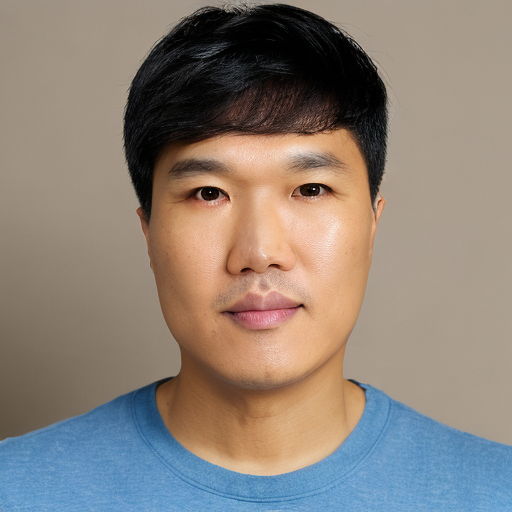

In [15]:
try:
    generated_image = generate_image(image_path=image, mask_path=mask, prompt=prompt,
                                     negative_prompt=negative_prompt, pipe=sd_pipe, seed=seed)
except TypeError as e:
    print(f"TypeError : {e}")

generated_image